In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import cluster_utils as utl
import warnings
warnings.filterwarnings('ignore')

### Loading and prepping data

In [2]:
# forming the groups
group1 = ['data/89-90.csv', 'data/90-91.csv',
          'data/91-92.csv', 'data/92-93.csv', 'data/93-94.csv']

group2 = ['data/94-95.csv', 'data/95-96.csv',
          'data/96-97.csv', 'data/97-98.csv', 'data/98-99.csv']

group3 = ['data/99-00.csv', 'data/00-01.csv',
          'data/01-02.csv', 'data/02-03.csv', 'data/03-04.csv']

group4 = ['data/05-06.csv', 'data/06-07.csv',
          'data/07-08.csv', 'data/08-09.csv', 'data/09-10.csv']

group5 = ['data/10-11.csv', 'data/11-12.csv',
          'data/12-13.csv', 'data/13-14.csv', 'data/14-15.csv']

group6 = ['data/15-16.csv', 'data/16-17.csv',
          'data/17-18.csv', 'data/18-19.csv', 'data/19-20.csv']

In [3]:
group1 = utl.combine_seasons(group1)
group2 = utl.combine_seasons(group2)
group3 = utl.combine_seasons(group3)
group4 = utl.combine_seasons(group4)
group5 = utl.combine_seasons(group5)
group6 = utl.combine_seasons(group6)

In [4]:
# group 6 had additional positions (13 players in total) converting them to RW
group6['Pos'] = np.where(group6['Pos'] == 'F', 'RW', group6['Pos'])
group6['Pos'] = np.where(group6['Pos'] == 'W', 'RW', group6['Pos'])

In [5]:
X1, player1 = utl.prep_group(group1)
X2, player2 = utl.prep_group(group2)
X3, player3 = utl.prep_group(group3)
X4, player4 = utl.prep_group(group4)
X5, player5 = utl.prep_group(group5)
X6, player6 = utl.prep_group(group6)

In [6]:
goon1 = utl.get_goons(group1)
goon2 = utl.get_goons(group2)
goon3 = utl.get_goons(group3)
goon4 = utl.get_goons(group4)
goon5 = utl.get_goons(group5)
goon6 = utl.get_goons(group6)

### Clustering offense and defense separately

#### Splitting offense and defense

In [7]:
X1_f, player1_f, X1_d, player1_d = utl.split_pos(group1)
X2_f, player2_f, X2_d, player2_d = utl.split_pos(group2)
X3_f, player3_f, X3_d, player3_d = utl.split_pos(group3)
X4_f, player4_f, X4_d, player4_d = utl.split_pos(group4)
X5_f, player5_f, X5_d, player5_d = utl.split_pos(group5)
X6_f, player6_f, X6_d, player6_d = utl.split_pos(group6)

#### Group 1

For n_clusters = 2 The average silhouette_score is : 0.3937792718010922
For n_clusters = 2 The average silhouette_score is : 0.4545510786056546


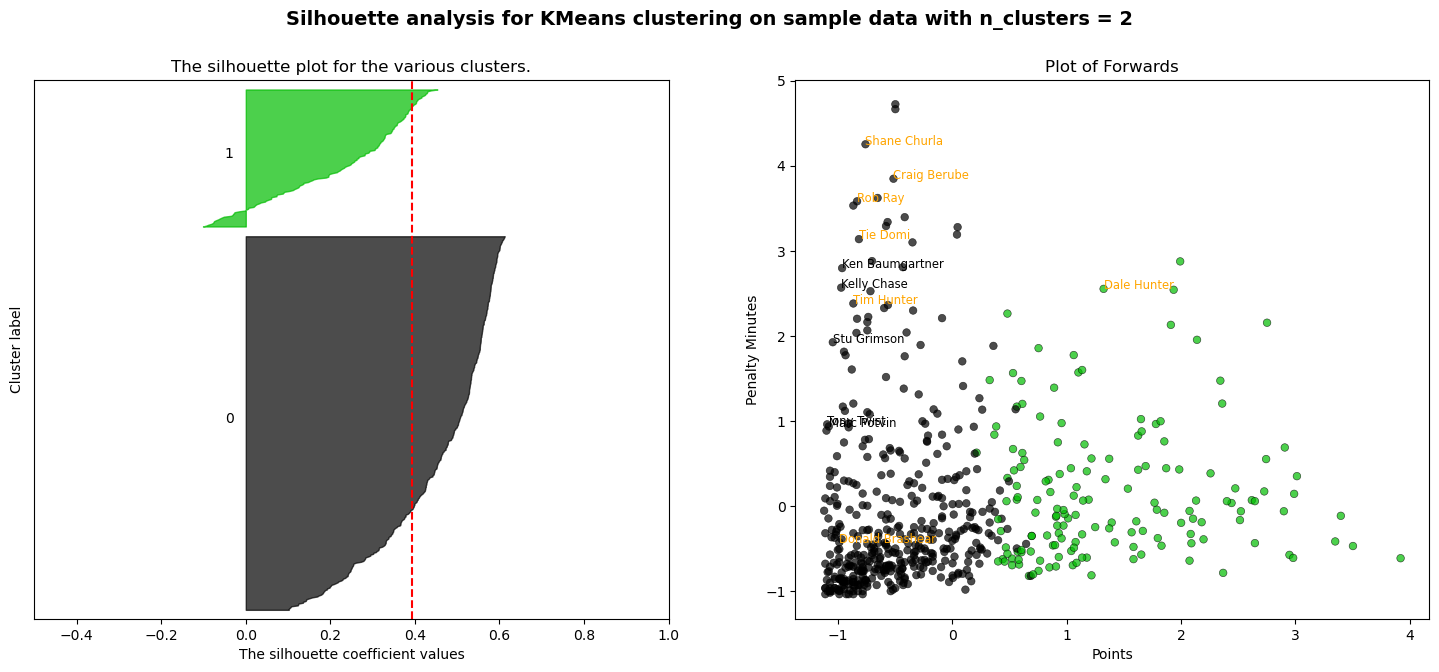

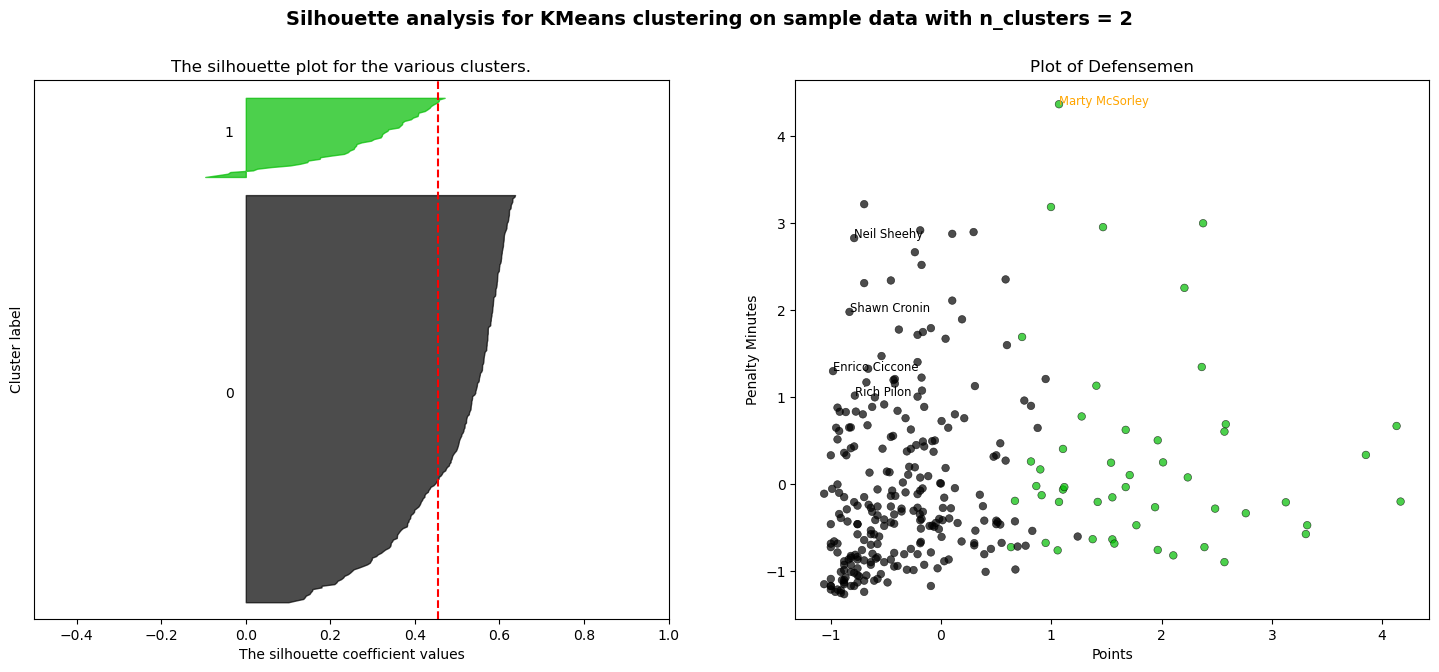

In [8]:
g1_f_labs, g1_f_sil = utl.final_cluster(X1_f, player1_f, goon1, path='group1_f')
g1_d_labs, g1_d_sil = utl.final_cluster(X1_d, player1_d, goon1, path='group1_d')

#### Group 2

For n_clusters = 2 The average silhouette_score is : 0.36200642409446493
For n_clusters = 2 The average silhouette_score is : 0.39351175396754406


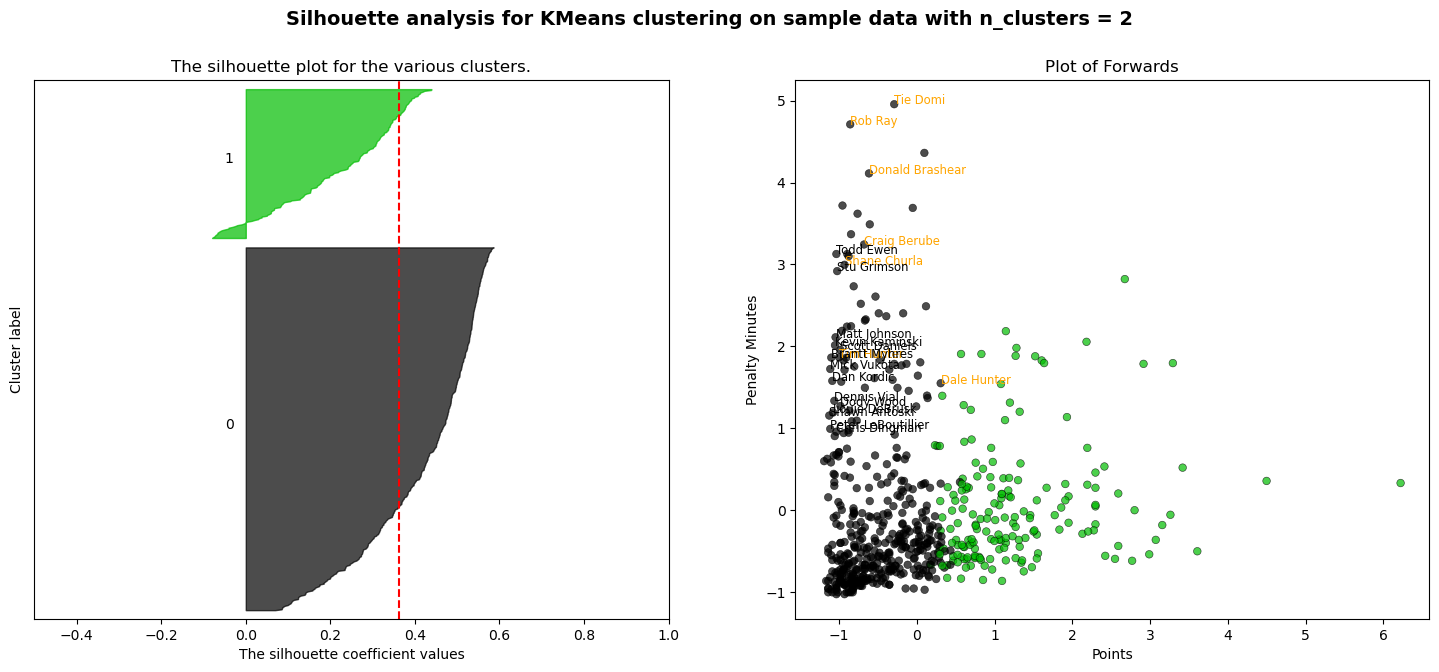

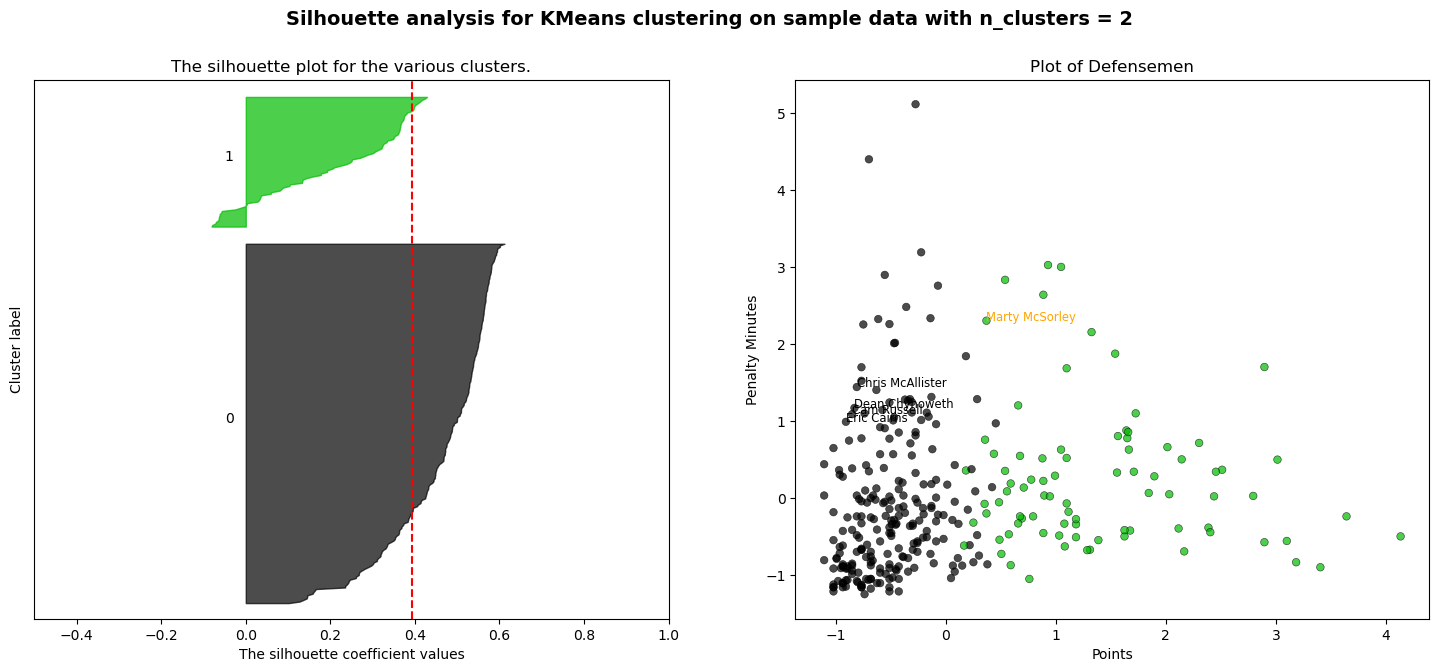

In [9]:
g2_f_labs, g2_f_sil = utl.final_cluster(X2_f, player2_f, goon2, path='group2_f')
g2_d_labs, g2_d_sil = utl.final_cluster(X2_d, player2_d, goon2, path='group2_d')

#### Group 3

For n_clusters = 2 The average silhouette_score is : 0.38604447737667463
For n_clusters = 2 The average silhouette_score is : 0.3644938938468317


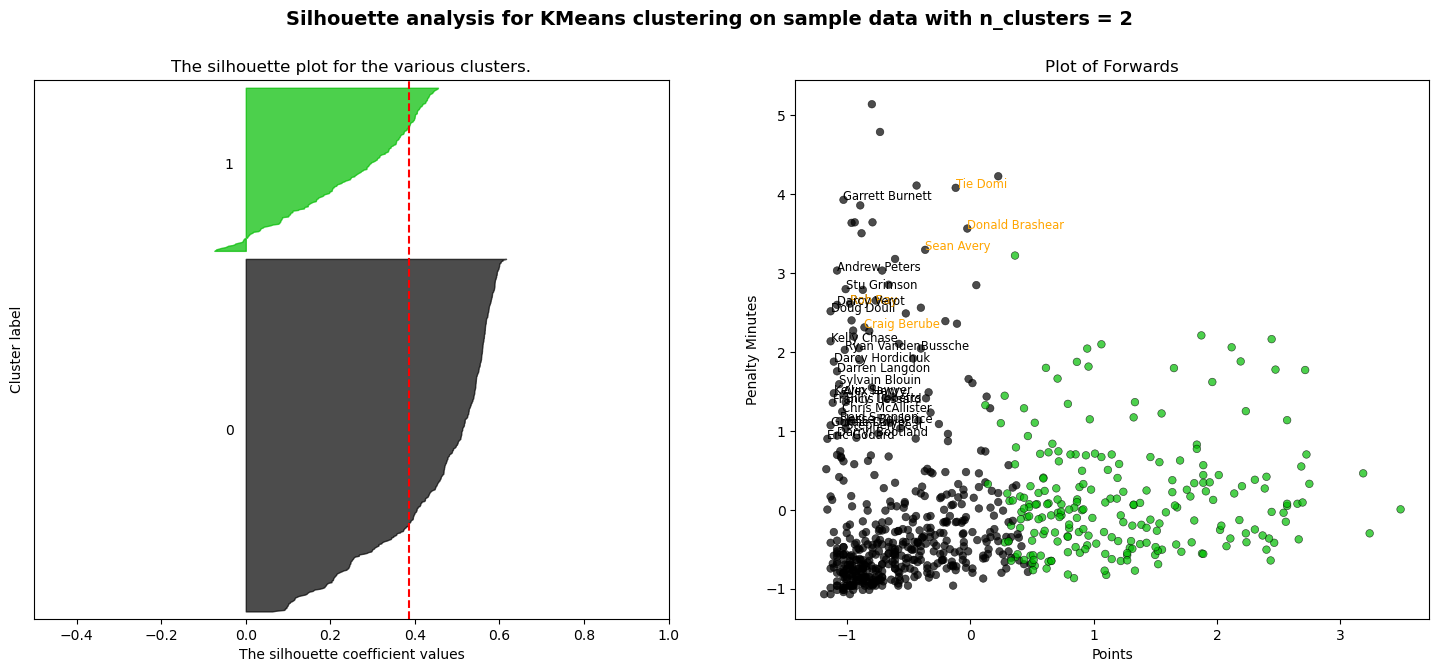

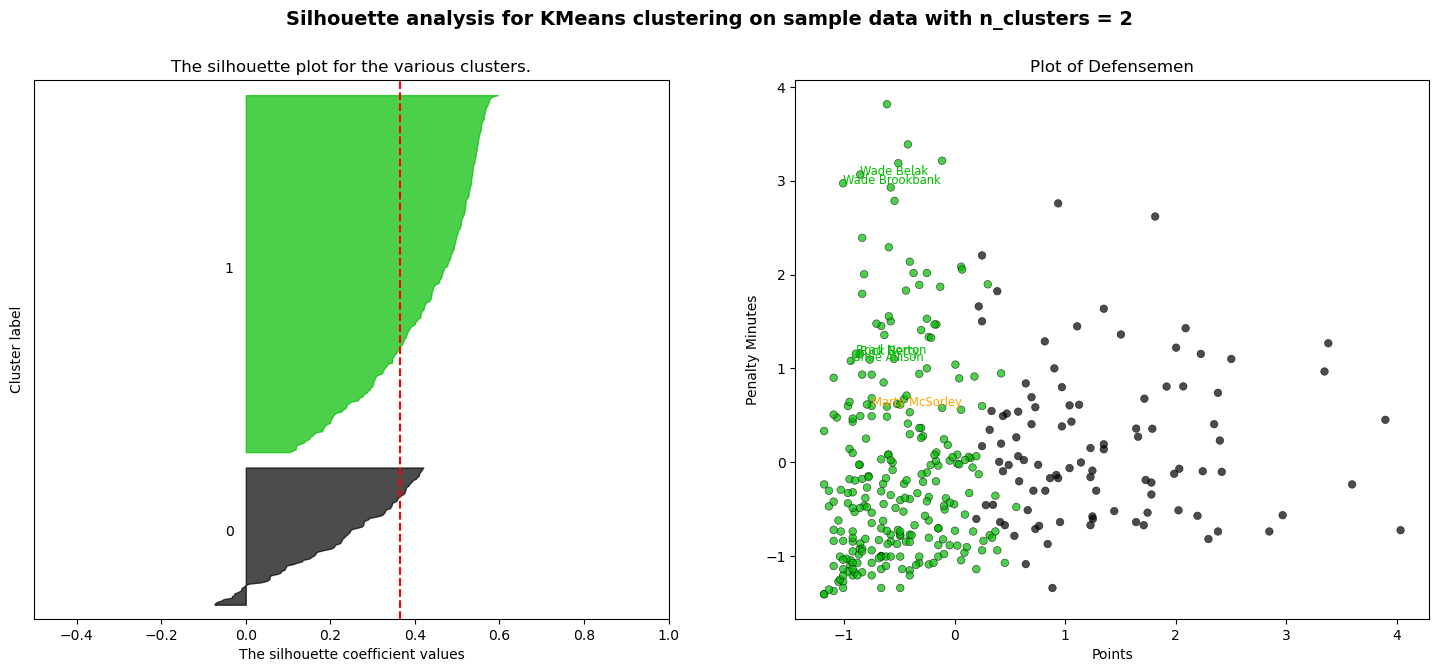

In [10]:
g3_f_labs, g3_f_sil = utl.final_cluster(X3_f, player3_f, goon3, path='group3_f')
g3_d_labs, g3_d_sil = utl.final_cluster(X3_d, player3_d, goon3, path='group3_d')

#### Group 4

For n_clusters = 2 The average silhouette_score is : 0.35983083183348435
For n_clusters = 2 The average silhouette_score is : 0.3514659041944655


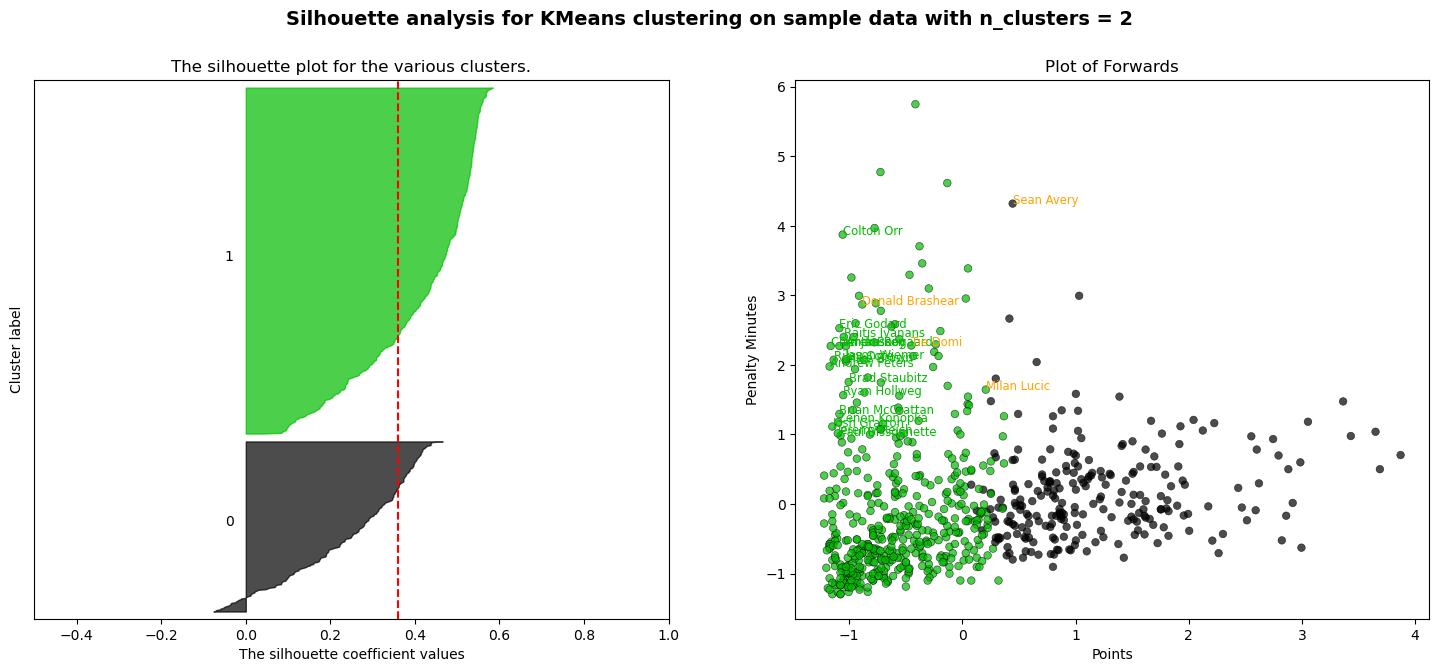

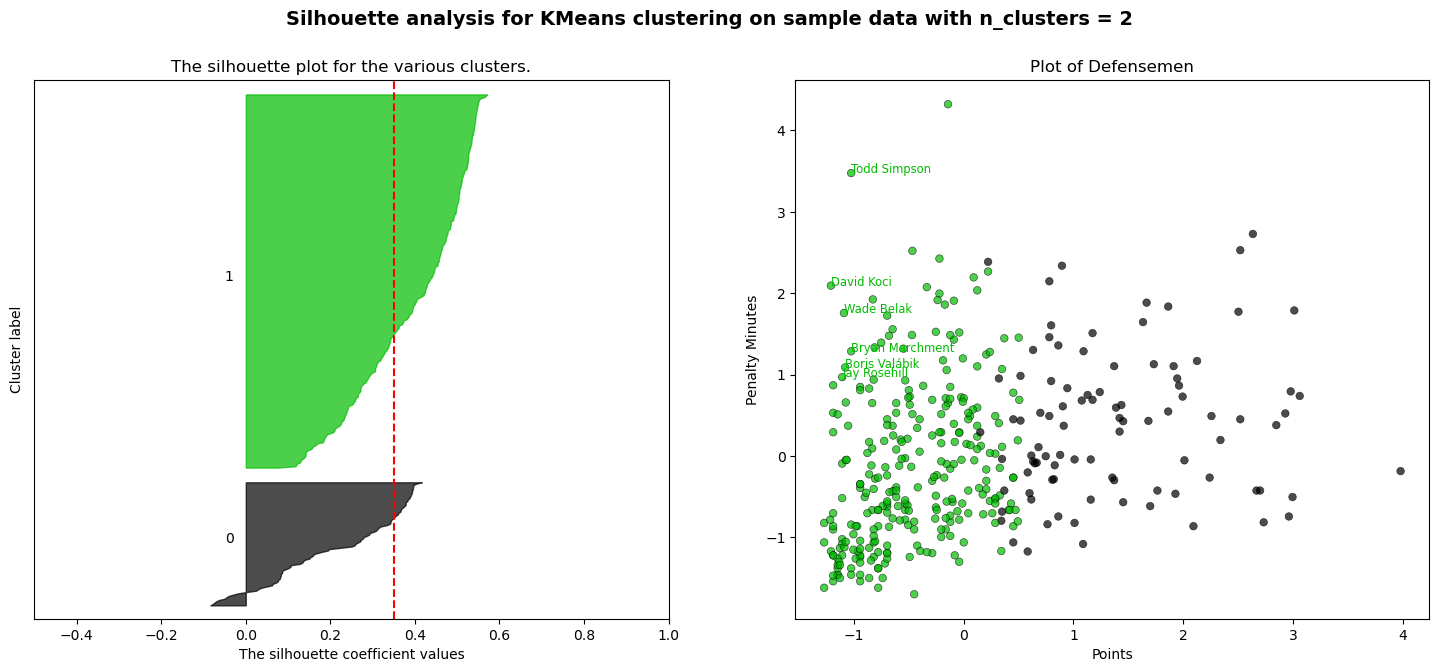

In [11]:
g4_f_labs, g4_f_sil = utl.final_cluster(X4_f, player4_f, goon4, path='group4_f')
g4_d_labs, g4_d_sil = utl.final_cluster(X4_d, player4_d, goon4, path='group4_d')

#### Group 5

For n_clusters = 2 The average silhouette_score is : 0.3515163355546879
For n_clusters = 2 The average silhouette_score is : 0.3740631637663991


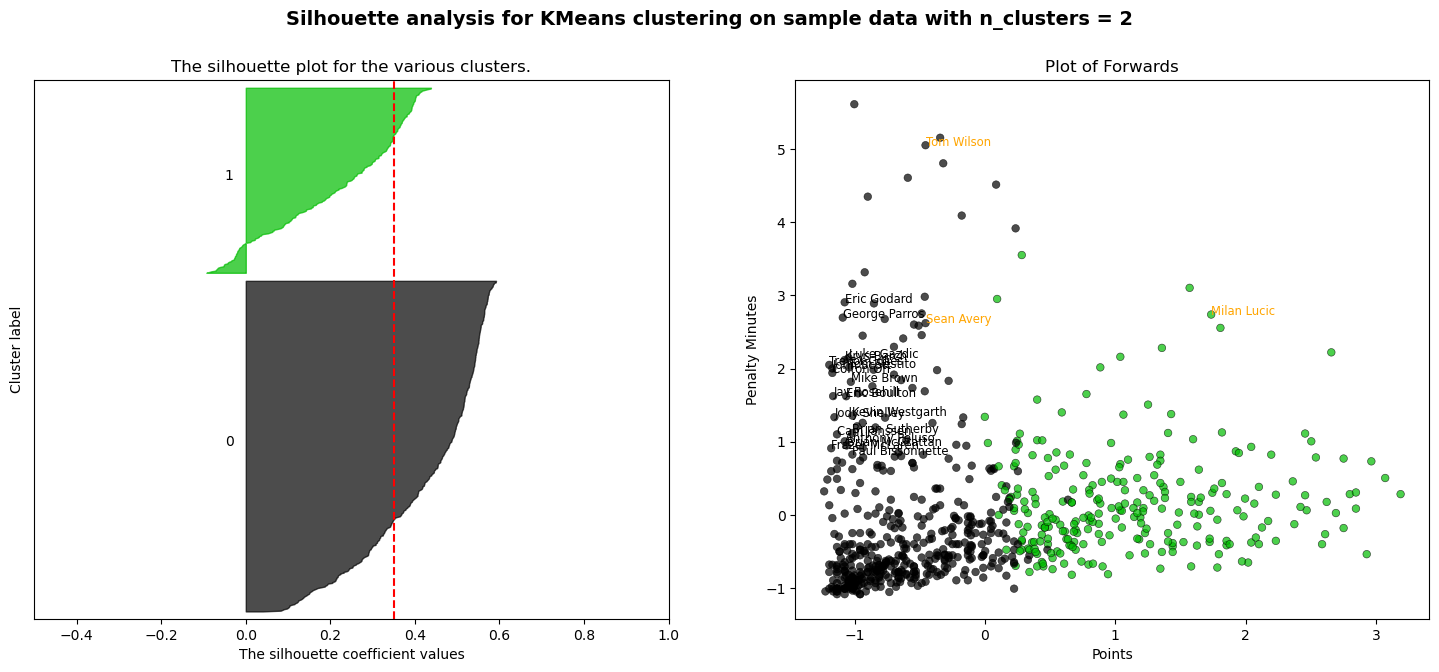

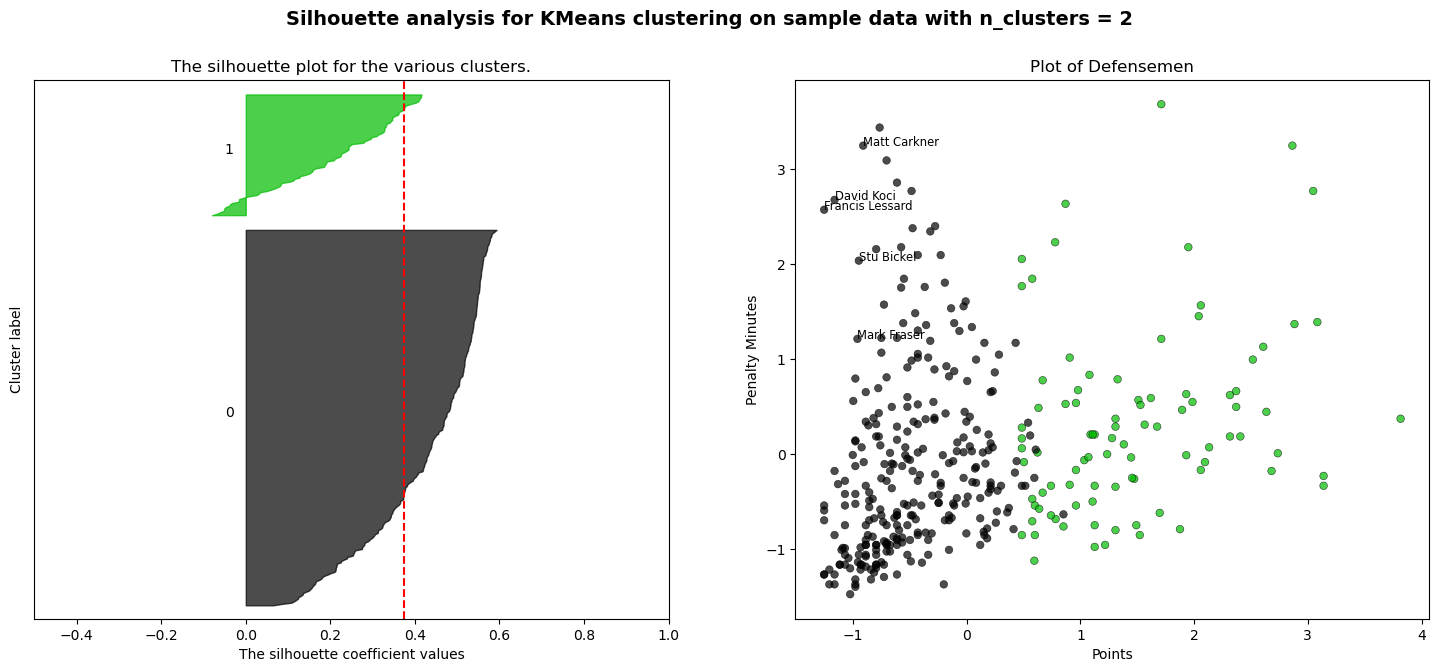

In [12]:
g5_f_labs, g5_f_sil = utl.final_cluster(X5_f, player5_f, goon5, path='group5_f')
g5_d_labs, g5_d_sil = utl.final_cluster(X5_d, player5_d, goon5, path='group5_d')

#### Group 6

For n_clusters = 2 The average silhouette_score is : 0.36817581032731533
For n_clusters = 2 The average silhouette_score is : 0.3805432770369305


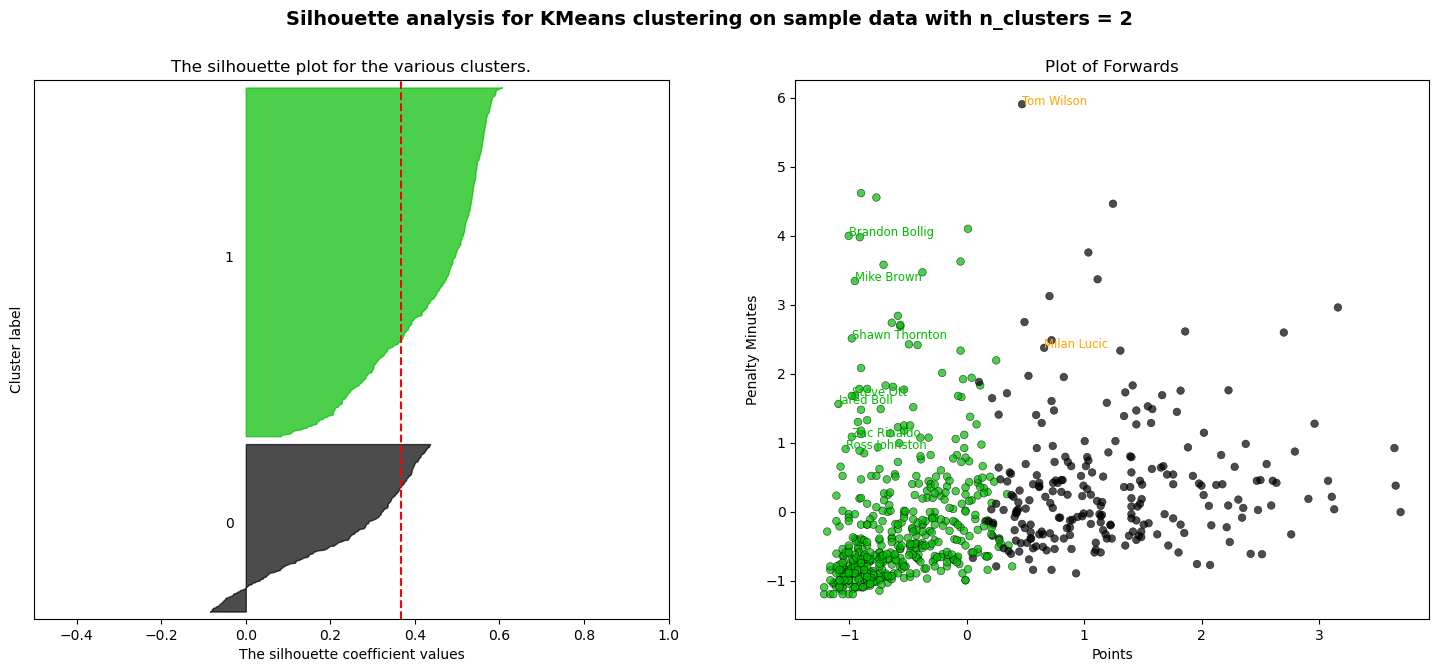

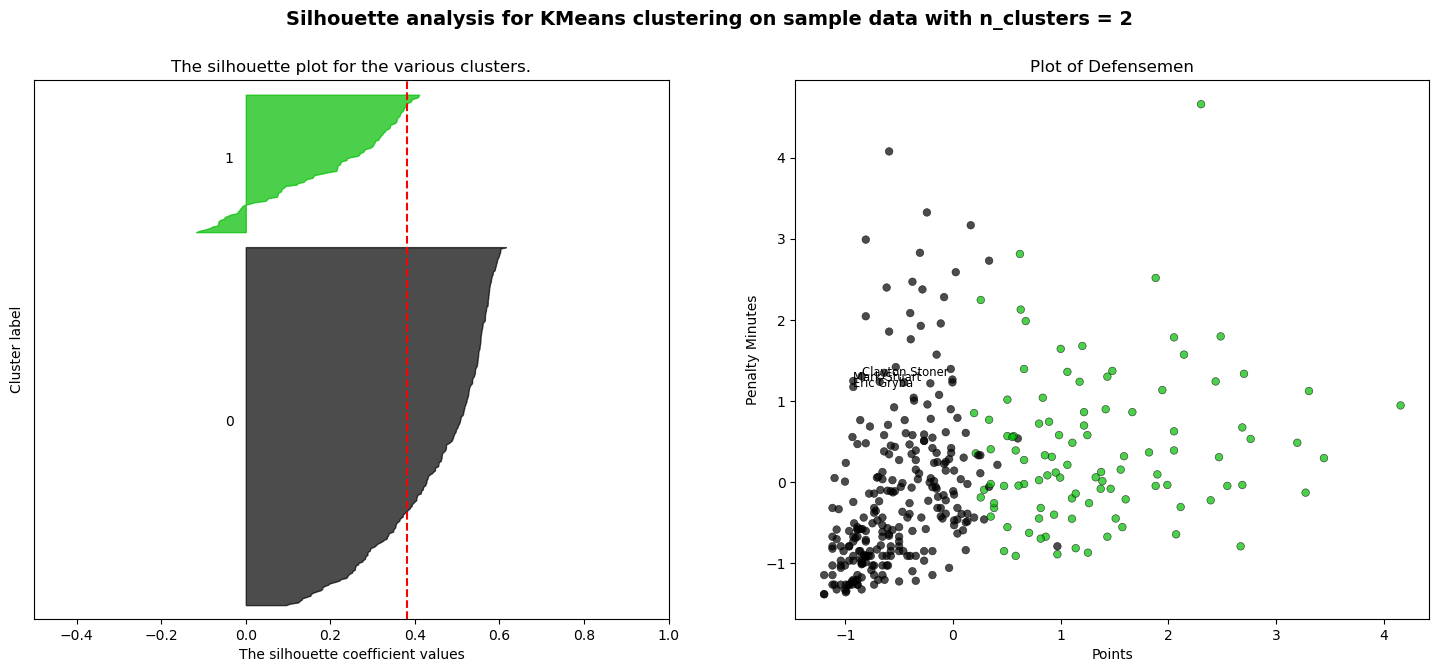

In [13]:
g6_f_labs, g6_f_sil = utl.final_cluster(X6_f, player6_f, goon6, path='group6_f')
g6_d_labs, g6_d_sil = utl.final_cluster(X6_d, player6_d, goon6, path='group6_d')

### Getting labels